# Linear Regression - Mini-Project 



---

Yousef Amr ElShazly's Project



---

Name:




Name:

ID:


---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-87-429e1deab270>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [88]:
#here are some of the codes i used to check the data types, data columns, unique value numbers, etc. to understand what must be cleaned
print(df.body.unique())


['sedan' 'SUV' 'Sedan' 'E-Series Van' 'Crew Cab' 'suv' 'G Sedan' 'Wagon'
 'Regular Cab' 'Double Cab' 'wagon' 'Coupe' 'Minivan' 'SuperCrew' 'coupe'
 'convertible' 'Extended Cab' 'Hatchback' 'van' 'hatchback' 'Van'
 'Convertible' 'SuperCab' 'g sedan' 'king cab' 'G Convertible' 'King Cab'
 'extended cab' 'quad cab' 'supercab' 'Beetle Convertible' 'minivan'
 'G Coupe' 'Quad Cab' 'crew cab' 'supercrew' 'CrewMax Cab' 'double cab'
 'g coupe' 'Club Cab' 'Access Cab' 'Genesis Coupe' 'e-series van'
 'G37 Convertible' 'Cab Plus 4' 'crewmax cab' 'genesis coupe'
 'promaster cargo van' 'access cab' 'Mega Cab' 'Koup' 'regular cab'
 'mega cab' 'Elantra Coupe' 'Q60 Convertible' 'regular-cab'
 'Promaster Cargo Van' 'Xtracab' 'CTS Coupe' 'CTS Wagon'
 'GranTurismo Convertible' 'beetle convertible' 'TSX Sport Wagon'
 'g convertible' 'tsx sport wagon' 'CTS-V Coupe' 'Q60 Coupe'
 'granturismo convertible' 'cts coupe' 'Transit Van' 'xtracab']


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [90]:
print(df.transmission.unique())


['automatic' 'manual']


In [91]:
print(df.seller.nunique())

4686


In [92]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [93]:
#this is to change the body to  have 'Sedan' and 'sedan' for example be the same by having everything in the format first letter is capital and also make all the sutiable object classes numerical including sellingprice,mmr and odometer
df['mmr'] = df['mmr'].interpolate().astype(str)
df['mmr'] = df['mmr'].str.extract('([0-9\s]+)', expand=False).str.strip()
df['mmr'] = df['mmr'].interpolate().astype(int)

df['odometer'] = df['odometer'].interpolate().astype(str)
df['odometer'] = df['odometer'].str.extract('([0-9 \s]+)', expand=False).str.strip()
df['odometer'] = df['odometer'].interpolate().astype(int)

df['sellingprice'] = df['sellingprice'].interpolate().astype(str)
df['sellingprice'] = df['sellingprice'].str.extract('([0-9 \s]+)', expand=False).str.strip()
df['sellingprice'] = df['sellingprice'].interpolate().astype(int)
df['body'] = df['body'].interpolate().astype(str)
df['body']=df['body'].str.capitalize()
df.info()
print(df.body.unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  int64  
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  int64  
 14  sellingprice  46578 non-null  int64  
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 5.7+ MB
['Sedan' 'Suv' 'E-series van' 'Crew cab' 'G sedan' 'Wa

In [94]:
#this is reducing the body to the 8 types: coupe, sedan, convertible, hatchback, suv ,minivan, wagon and pickup truck. Assuming supercrew is also a pickup truck and koup is a Coupe
df['body'] = df['body'].str.replace(r'.*\bcoupe\b.*', 'Coupe', case=False)
df['body'] = df['body'].str.replace(r'.*\bKoup\b.*', 'Coupe', case=False)
df['body'] = df['body'].str.replace(r'.*\bsedan\b.*', 'Sedan', case=False)
df['body'] = df['body'].str.replace(r'.*\bconvertible\b.*', 'Convertible', case=False)
df['body'] = df['body'].str.replace(r'.*\bhatchback\b.*', 'Hatchback', case=False)
df['body'] = df['body'].str.replace(r'.*\bsuv\b.*', 'SUV', case=False)
df['body'] = df['body'].str.replace(r'.*\bvan\b.*', 'Minivan', case=False)
df['body'] = df['body'].str.replace(r'.*\bwagon\b.*', 'Wagon', case=False)
df['body'] = df['body'].str.replace(r'.*\bcab\b.*', 'Pickup Truck', case=False)
df['body'] = df['body'].str.replace(r'.*\bXtracab\b.*', 'Pickup Truck', case=False)
df['body'] = df['body'].str.replace(r'.*\bSupercab\b.*', 'Pickup Truck', case=False)
df['body'] = df['body'].str.replace(r'.*\bSupercrew\b.*', 'Pickup Truck', case=False)



<ipython-input-94-90998f2c6cba>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace(r'.*\bcoupe\b.*', 'Coupe', case=False)
<ipython-input-94-90998f2c6cba>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace(r'.*\bKoup\b.*', 'Coupe', case=False)
<ipython-input-94-90998f2c6cba>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace(r'.*\bsedan\b.*', 'Sedan', case=False)
<ipython-input-94-90998f2c6cba>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replace(r'.*\bconvertible\b.*', 'Convertible', case=False)
<ipython-input-94-90998f2c6cba>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body'] = df['body'].str.replac

In [95]:
print(df.body.unique())

['Sedan' 'SUV' 'Minivan' 'Pickup Truck' 'Wagon' 'Coupe' 'Convertible'
 'Hatchback']


In [96]:
#remove all '—' values and replace them with the most common value for the column color(black)
most_frequent_value = df[df['color'] != "—"]['color'].mode().iloc[0]
# Replace values equal to '—' with the most frequent value
df.loc[df['color'] == '—', 'color'] = most_frequent_value
print(df.color.nunique())
print(most_frequent_value)



19
black


In [97]:
#we will do the same for interior
most_frequent_value = df[df['interior'] != "—"]['interior'].mode().iloc[0]
# Replace values equal to '—' with the most frequent value was also black
df.loc[df['interior'] == '—', 'interior'] = most_frequent_value
print(df.color.nunique())
print(most_frequent_value)





19
black


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

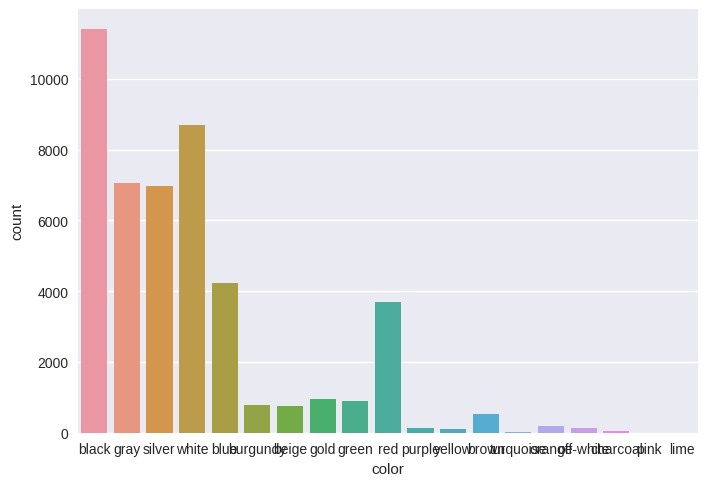

In [98]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

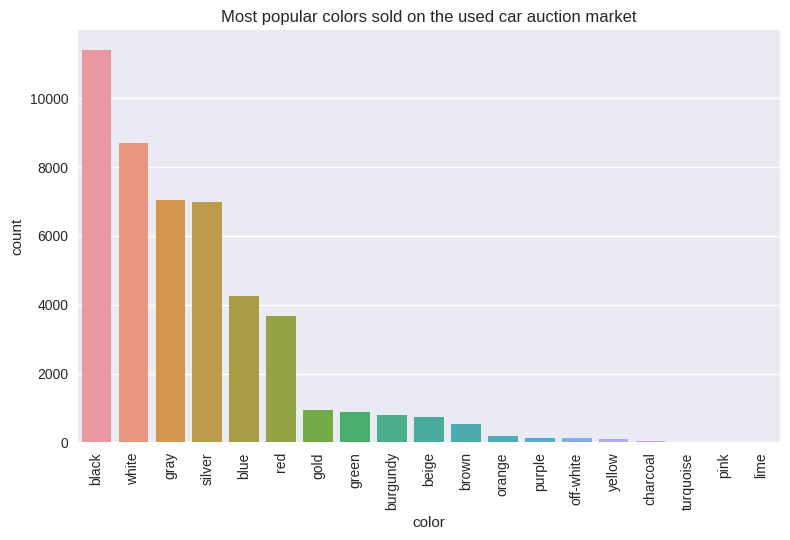

In [99]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

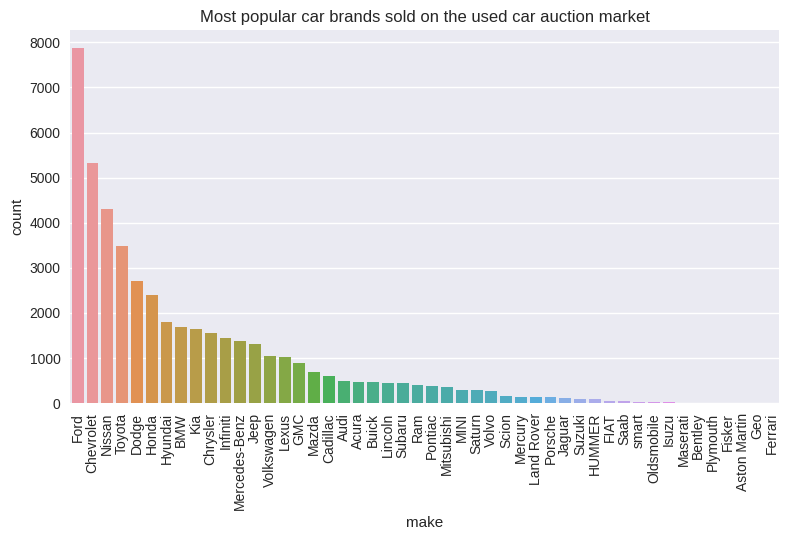

In [100]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford is the most popular then chevorlet then nissan

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

[Text(0.5, 1.0, '')]

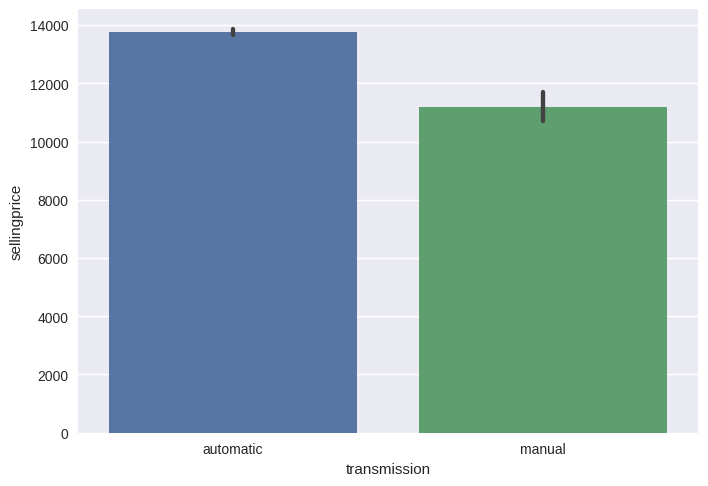

In [101]:
sns.barplot(df,x='transmission',y='sellingprice').set(title='')

**Answer for Q2**: automatic sells on average on a higher price than manual

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

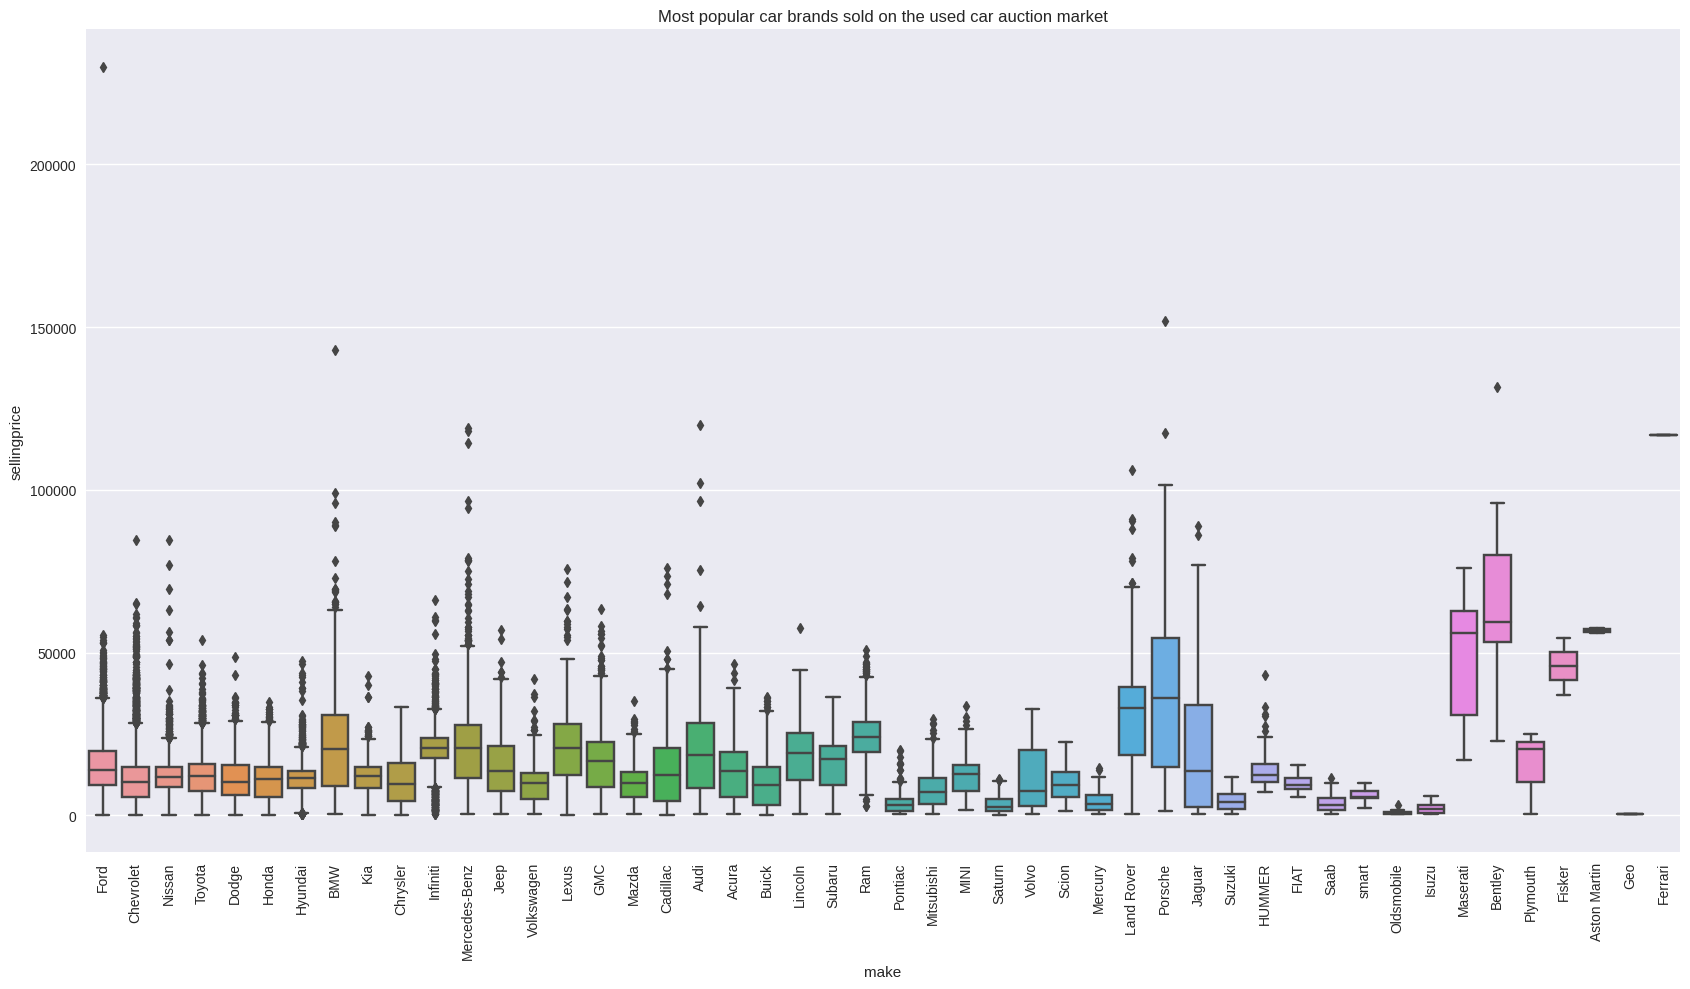

In [102]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
plt.figure(figsize=(17,10))
sns.boxplot(x='make',y='sellingprice' ,data=df, order=large_to_small.index).set(title='Most popular car brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()


**Answer for Q3**: porsche has the widest distribution of selling prices, and second widest is Jaguar moreover  the highest price is ferrari and second highest is Porsche

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

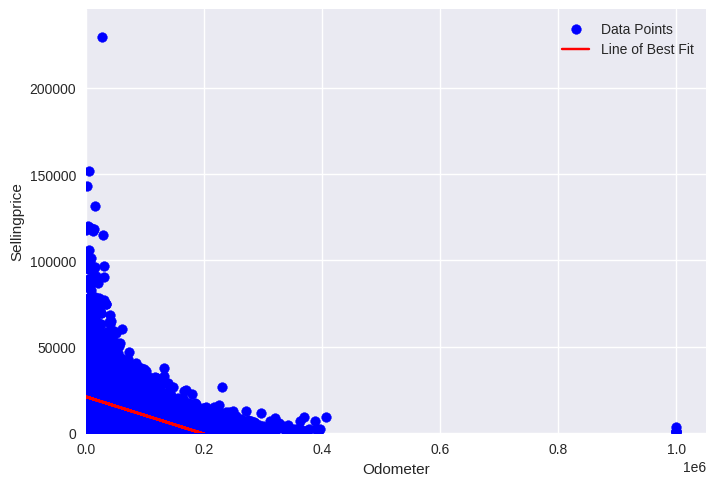

In [103]:
x = df['odometer'].values
y = df['sellingprice'].values
coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # slope
b = coefficients[1]  # y-intercept
# Generate the line of best fit
line_of_best_fit = m * x + b

# Plot the original data points and the line of best fit
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')
plt.ylim(0, None)
plt.xlim(0, None)

plt.xlabel('Odometer')
plt.ylabel('Sellingprice')
plt.legend()
plt.show()

**Answer for Q4**: It is a negative correlation since when the mileage increases, the selling price decreases

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

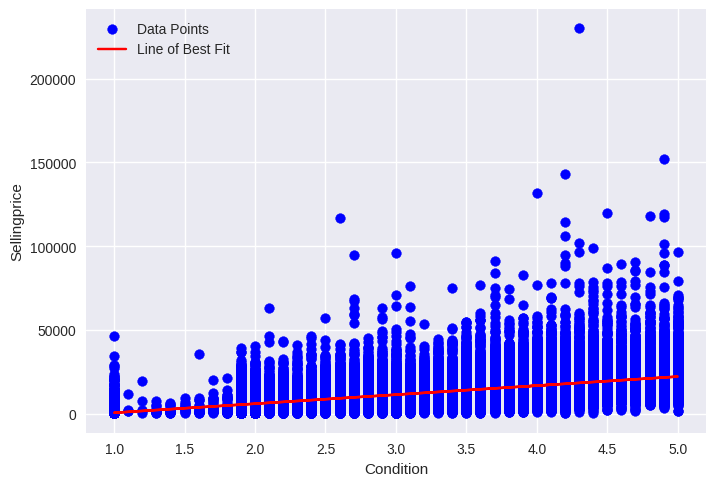

In [104]:
x = df['condition'].values
y = df['sellingprice'].values
coefficients = np.polyfit(x, y, 1)
m = coefficients[0]  # slope
b = coefficients[1]  # y-intercept
# Generate the line of best fit
line_of_best_fit = m * x + b

# Plot the original data points and the line of best fit
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

plt.xlabel('Condition')
plt.ylabel('Sellingprice')
plt.legend()
plt.show()

**Answer for Q5**: There is a positive correlation between the selling price and the condition when the condition increases the selling price increases however the correlation is not strong.

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

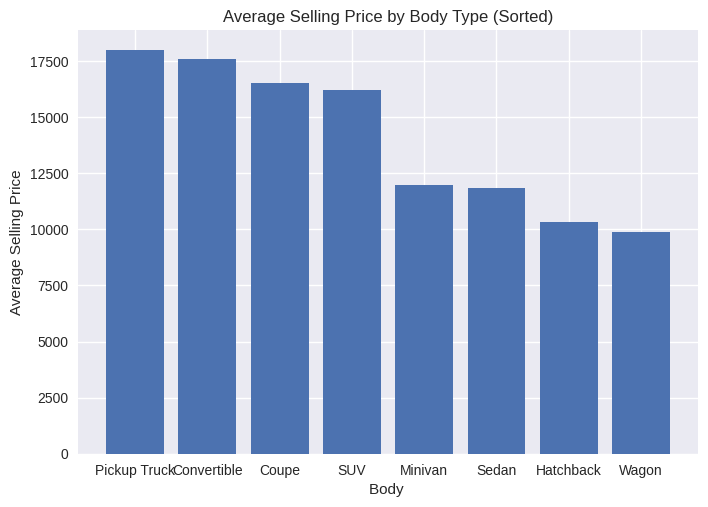

In [105]:

average_price = df.groupby('body')['sellingprice'].mean()

# Sort the average prices in descending order
average_price_sorted = average_price.sort_values(ascending=False)

# Plotting the sorted bar plot
plt.bar(average_price_sorted.index, average_price_sorted.values)
plt.xlabel('Body ')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Body Type (Sorted)')
plt.show()

**Answer for Q6**: Yes there is a difference in the car prices due to its body type. the highest average price to lowest average price is in this order: Pickup truck, convertible,coupe,SUV,Minivan,Sedan,Hatchback,Wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [106]:
print(df.model.nunique())

#too many unique variables so we will remove, and repeating this for every column


648


In [107]:
print(df.trim.nunique())
#dropping trim

1097


In [108]:
print(df.saledate.nunique())
#dropping saledate

2286


In [109]:
print(df.vin.nunique())
#dropping vin


46578


In [110]:
print(df.seller.nunique())
#dropping seller

4686


In [111]:
print(df.color.nunique())
#we wil keep this for now

19


In [112]:
print(df.interior.nunique())
#keeping for now

16


In [113]:
print(df.make.nunique())
#keeping make for now

48


In [114]:
print(df.state.nunique())
#keeping state for now

34


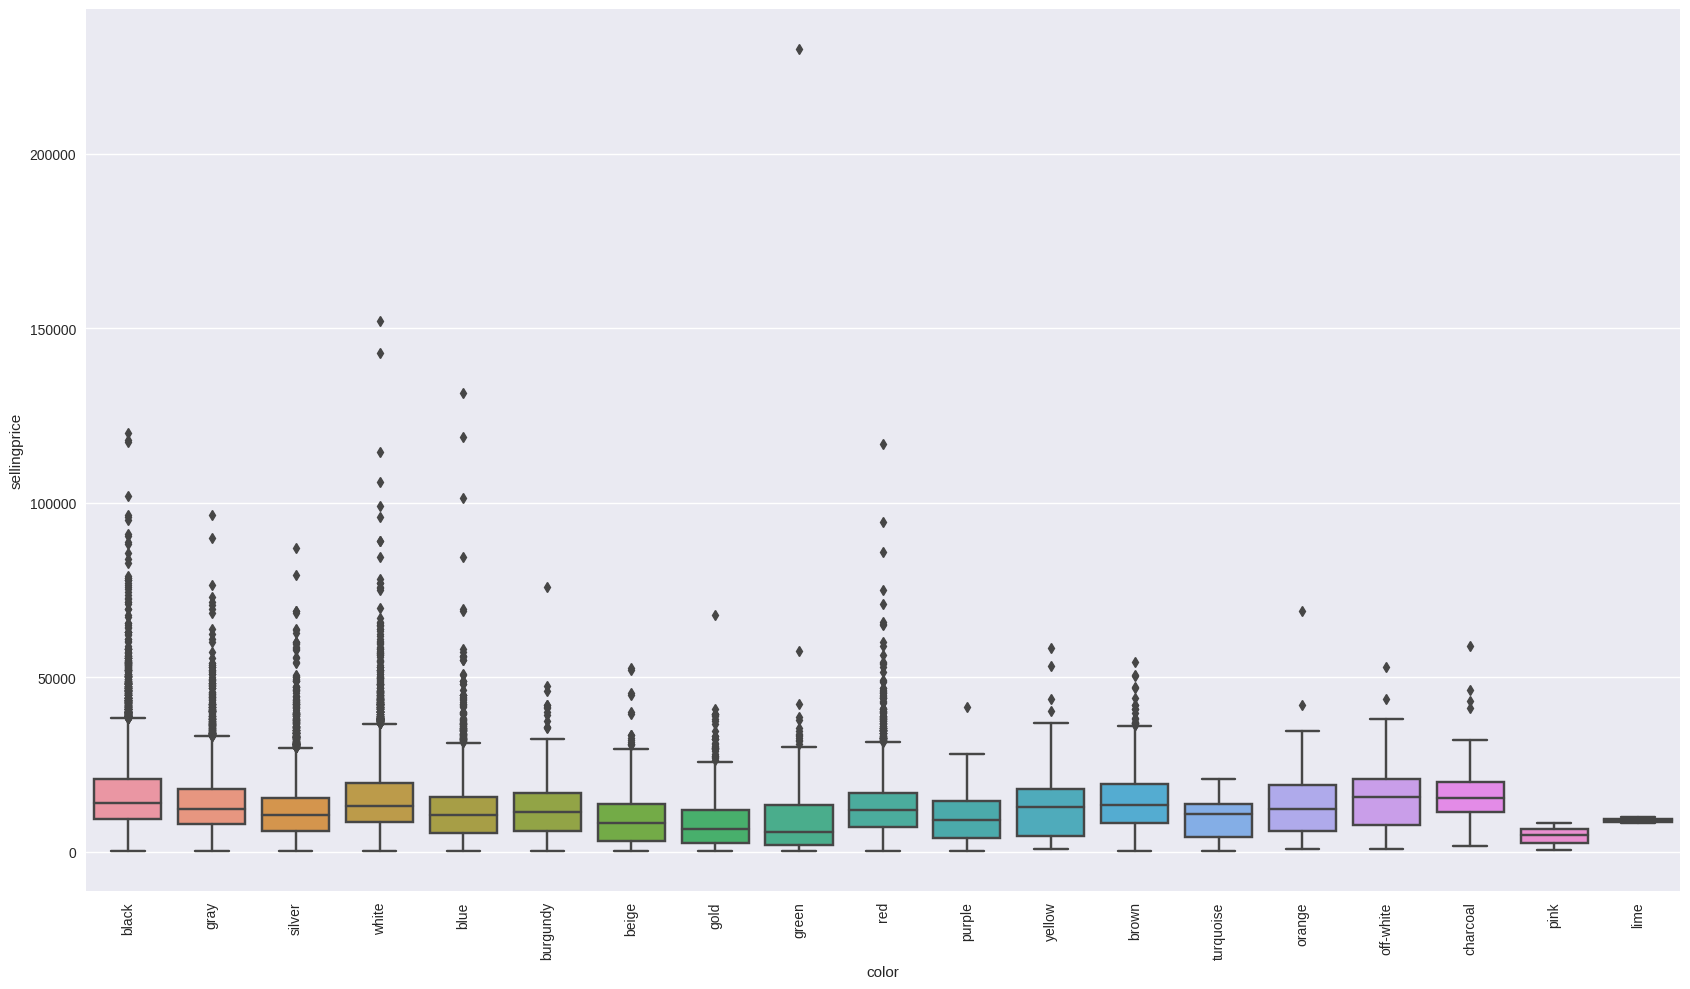

In [115]:
plt.figure(figsize=(17,10))
sns.boxplot(x='color',y='sellingprice' ,data=df)
plt.xticks(rotation=90)
plt.tight_layout()
#here we visualize the color and the selling price to know if we will pick it in the model or not

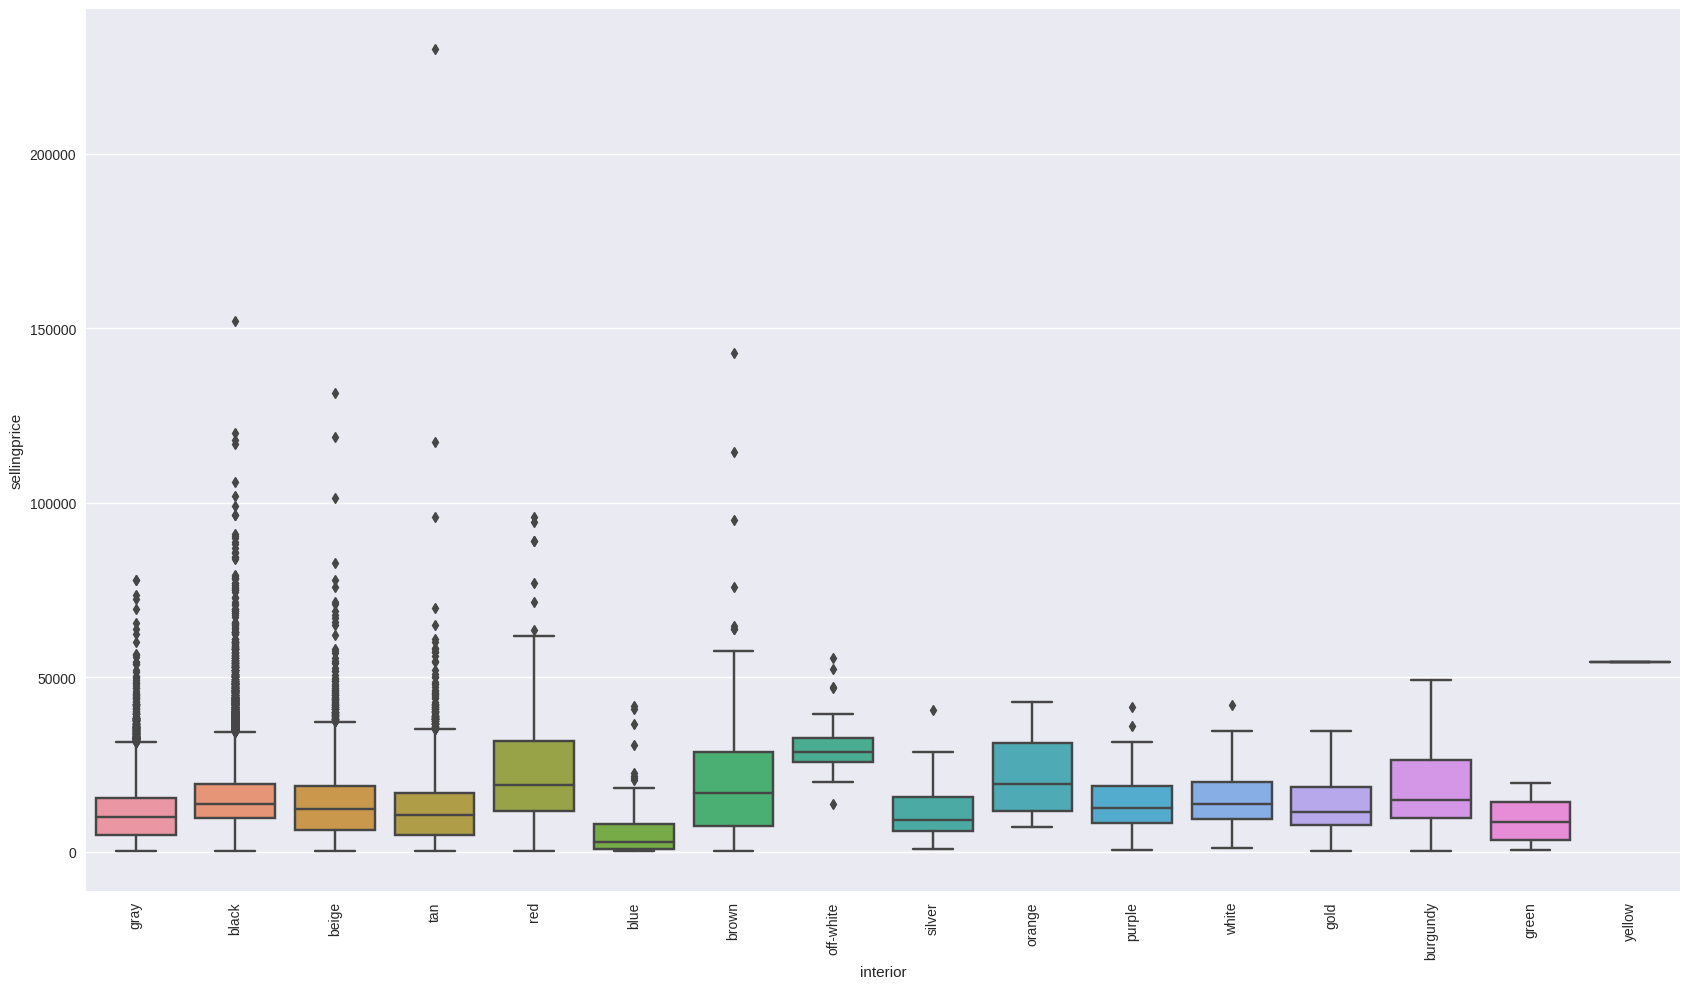

In [116]:
plt.figure(figsize=(17,10))
sns.boxplot(x='interior',y='sellingprice' ,data=df)
plt.xticks(rotation=90)
plt.tight_layout()
#here we visualize the interior and the selling price to know if we will pick it in the model or not

In [117]:

#Useless columns when it comes to modelling would be dropping : model,trim,saledate,vin and seller,because they have too many unique attributes/ do not make sense to be added in the model
#for example the vin is the identification number that will  be specific to each car that will not help the model predict the car price.
#moreover we visualized the color and the interior columnn and since all the values have nearly the same prices we will discard the color and the interior columns
#another point is that the transmission that we visualized earlier had a slight difference between the price of automatic and manual cars so we will discard it aswell
df_model = df.copy()
columns_to_drop = ['trim','saledate','vin','seller','model','transmission','color','interior']
df_model = df.drop(columns_to_drop, axis=1)



In [118]:
numerical_columns = ['odometer', 'condition','year'] #here we are normalizing the numerical values that will be used for the model(odometer and condition and year)
#mmr will be dropped because it doesnt make sense to include it since if you know the mmr its technically really close to the selling price and has high correlation with it so it will produce an issue of overfiiting
# we will keep year since if the car is newer it should be higher price, also with the odometer, the more the car travels the lower its price, and lastly based on condition the higher the condidition value of the car
#better


df_model[numerical_columns] = (

    df_model[numerical_columns] - df_model[numerical_columns].min()

) /(

    df_model[numerical_columns].max() - df_model[numerical_columns].min()
)

In [119]:
#we will add  use these columns for the model: year,condition, odometer,make and body


In [120]:
categorical_columns = ['body','make'] #we are changing those categorical values to onehot encoded values for the model
df_model = pd.get_dummies(data=df_model,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

In [121]:
columns_to_drop1 = ['mmr','state'] #we are dropping these tables and we are dropping the state since in testing it does not affect the R squared
df_model = df_model.drop(columns_to_drop1, axis=1)
df_model_outlier=df_model.copy()
#here we are copying the dataframe before testing the model to test again without outliers

## Modelling

_Apply the linear regression model below._

In [122]:
#here we are creating the model and applying it on the independent variables to predict selling price, at the end we chose the year, condition ,odometer, body and make

from sklearn.model_selection import train_test_split

x = df_model.drop('sellingprice',axis=1) # Independent variable
y = df_model['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


In [123]:
#applying the linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [124]:
#equations fo the linear regression with the theta values
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2006.216149
1,theta_1,year,23972.008649
2,theta_2,condition,6829.123204
3,theta_3,odometer,-42963.263702
4,theta_4,body_Coupe,754.171647
5,theta_5,body_Hatchback,-5237.868916
6,theta_6,body_Minivan,-787.976046
7,theta_7,body_Pickup Truck,5677.777614
8,theta_8,body_SUV,1393.663818
9,theta_9,body_Sedan,-3561.685394


In [125]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

## Model Evaluation

_Evaluate the model you applied._

In [126]:
# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  5448.825417768889
R^2 obtained is: 0.6786461425946448


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The values were the root mean square eroor was approimately 5449 and the R squared is approximately 0.68. the rmse means that the difference of a selling price could have an error of up to 5449 dollars.
and the R squared is a value from 1-0 1 being the model and 0 being the data variance not explained at all the proportion of variance measured by the model, so 0.68% was explained by the model but the other 32% was not explained , overall the models accuracy was okay however it could have been improved, some solutions might include reducing outliers, and maybe a larger amount of data to train on. I would recommend this model for a used cars dealership because the estimates are somewhat accurate and it could give a rough estimate of the car price.

 **Bonus**
We will remove outliers and see how it will affect the results using the interquartile range.

In [127]:

# This is a function to remove outliers using IQR after testing the selling price
# Calculating the Inter Quartile Range
Q1 = df_model_outlier['sellingprice'].quantile(0.25)
Q3 = df_model_outlier['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

#Those are the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#here we are removing the outliers from the data
df_model_outlier = df_model_outlier[(df_model_outlier['sellingprice'] >= lower_bound) & (df_model_outlier['sellingprice'] <= upper_bound)]
#now we will test the model again and check the results
from sklearn.model_selection import train_test_split

x = df_model_outlier.drop('sellingprice',axis=1) # Independent variable
y = df_model_outlier['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 36151
Testing dataset size: 9038


In [128]:
#applying the linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);


In [129]:
#equations fo the linear regression with the theta values
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-9.582755e+02
1,theta_1,year,2.151461e+04
2,theta_2,condition,6.081419e+03
3,theta_3,odometer,-3.885755e+04
4,theta_4,body_Coupe,1.908540e+02
5,theta_5,body_Hatchback,-4.536614e+03
6,theta_6,body_Minivan,-2.995745e+02
7,theta_7,body_Pickup Truck,5.327245e+03
8,theta_8,body_SUV,1.475965e+03
9,theta_9,body_Sedan,-2.826805e+03


In [130]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

In [131]:
# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3822.5551107308193
R^2 obtained is: 0.7458931092951608


In [ ]:
#Now as we can see the outlier reduction reduced the R squared by 7% and reduced the RMSE by nearly 3000, which is a big improvement from the last section without removing the outliers